In [ ]:
 pip install keras

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
df=pd.read_csv("forestfires.csv")

In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
X=df.iloc[:,:30]

In [ ]:
X.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],
      dtype='object')

In [ ]:
X.dtypes

month        object
day          object
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
dayfri        int64
daymon        int64
daysat        int64
daysun        int64
daythu        int64
daytue        int64
daywed        int64
monthapr      int64
monthaug      int64
monthdec      int64
monthfeb      int64
monthjan      int64
monthjul      int64
monthjun      int64
monthmar      int64
monthmay      int64
monthnov      int64
monthoct      int64
monthsep      int64
dtype: object

In [ ]:
Y=df["size_category"]


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
X["month"]=LE.fit_transform(X["month"])
X["month"]=pd.DataFrame(X["month"])

In [ ]:
X["day"]=LE.fit_transform(X["day"])
X["day"]=pd.DataFrame(X["day"])

In [ ]:
df["size_category"]=LE.fit_transform(df["size_category"])
Y=pd.DataFrame(df["size_category"])
Y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [ ]:
model=Sequential()
model.add(Dense(45,input_dim=30,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(X,Y,validation_split=0.33,epochs=250,batch_size=10)
scores=model.evaluate(X,Y)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))
history.history.keys()

Epoch 1/250
35/35 [==============================] - 1s 10ms/step - loss: 3.6210 - accuracy: 0.6763 - val_loss: 9.5348 - val_accuracy: 0.4912
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 1.8046 - accuracy: 0.7081 - val_loss: 5.5192 - val_accuracy: 0.5380
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: 1.0554 - accuracy: 0.7977 - val_loss: 4.5462 - val_accuracy: 0.5614
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.8410 - val_loss: 2.2537 - val_accuracy: 0.6784
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.9017 - val_loss: 1.6694 - val_accuracy: 0.6901
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.9191 - val_loss: 0.5943 - val_accuracy: 0.8363
Epoch 7/250
35/35 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.8988 - val_loss: 0.5102 - val_accuracy: 0.8421
Epoch 8/250


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

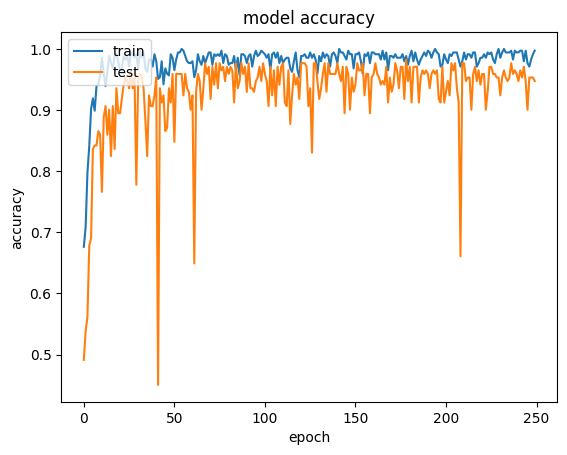

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

